In [1]:
library(methylKit)
library(tidyverse)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


At

In [2]:
sample_ids_v = c(
 '2017',
 '2018', 
 '2019', 
 '2026', 
 '2027', 
 '2033',
 '3052',
 '3131',
 '3158', 
 'CAD26',
 'CAD41',
 'CAD42',
 'CAD46',
 'SK',
 'VF')
groups_v= c(1,1,2,3,3,2,1,2,1,4,4,4,4,0,0)


sample_ids_v_no_cad = c(
 '2017',
 '2018', 
 '2019', 
 '2026', 
 '2027', 
 '2033',
 '3052',
 '3131',
 '3158', 
 'SK',
 'VF')
groups_v_no_cad= c(1,1,2,3,3,2,1,2,1,0,0)

In [3]:
p06_methyl_calls_v="/local/rcuadrat/cfdna_validation/out/06_methyl_calls/"


In [4]:
#functions
my.read.Tabix = function( dbpath,
                          dbtype,
                          sample.id, 
                          assembly ,
                          context,
                          resolution){
require(methylKit)
object.dt =data.table::fread( paste0('zcat ',dbpath))
methylKit:::.setMethylDBNames(object.dt)

num.records=Rsamtools::countTabix( dbpath )[[1]]

object <- new("methylRawDB",
          dbpath= dbpath,
          num.records=num.records,
          sample.id = sample.id, 
          assembly = assembly,
          context=context,
          resolution=resolution,
          dbtype=dbtype)
list(obj=object, 
     obj.dt=object.dt)

}

In [5]:
tabix.files.filtered.dt=lapply(sample_ids_v, function(s){
           dbpath = paste0(p06_methyl_calls_v, "methylKit/tabix_cpg/",s,"_1_val_1_bt2.sorted.deduped_cpg.txt.bgz" )
           tmp=my.read.Tabix(dbpath,
               "tabix",
                s, 
                "hg38" ,
                "CpG",
                "base")})
 names(tabix.files.filtered.dt) = sample_ids_v

 methRawList_fil=new("methylRawList",
   lapply(tabix.files.filtered.dt, function(x) x$obj),
   treatment=groups_v)

Taking input= as a system command ('zcat /local/rcuadrat/cfdna_validation/out/06_methyl_calls/methylKit/tabix_cpg/2017_1_val_1_bt2.sorted.deduped_cpg.txt.bgz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, and the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.

Warning message in (if (.Platform$OS.type == "unix") system else shell)(paste0("(", :
"error in running command"
Warning message in data.table::fread(paste0("zcat ", dbpath)):
"File '/tmp/Rtmp09SEEG/file669c835aa' has size 0. Returning a NULL data.table."
Taking input= as a system command ('zcat /local/rcuadrat/cfdna_validation/out/06_methyl_calls/methylKit/tabix_cpg/2018_1_val_1_bt2.sorted.deduped_cpg.txt.bgz') and a variable has been used in t

In [64]:
tabix.files.filtered.dt

$`2017`
$`2017`$obj
methylRawDB object with 198769 rows
--------------
   chr  start    end strand coverage numCs numTs
1 chr1 904196 904196      -        5     0     5
2 chr1 904198 904198      -        6     1     5
3 chr1 904213 904213      -        6     0     6
4 chr1 904239 904239      -       11     0    11
5 chr1 904254 904254      -       24    11    13
6 chr1 904289 904289      -       50    17    33
--------------
sample.id: 2017 
assembly: hg38 
context: CpG 
resolution: base 
dbtype: tabix 


$`2017`$obj.dt
Null data.table (0 rows and 0 cols)


$`2018`
$`2018`$obj
methylRawDB object with 200162 rows
--------------
   chr  start    end strand coverage numCs numTs
1 chr1 904129 904129      -        6     5     1
2 chr1 904137 904137      -        6     6     0
3 chr1 904239 904239      -        5     2     3
4 chr1 904254 904254      -        9     7     2
5 chr1 904289 904289      -       25    13    12
6 chr1 904316 904316      -       39    32     7
--------------
sample.

In [6]:
methDB<-methylKit::unite(methRawList_fil)


uniting...



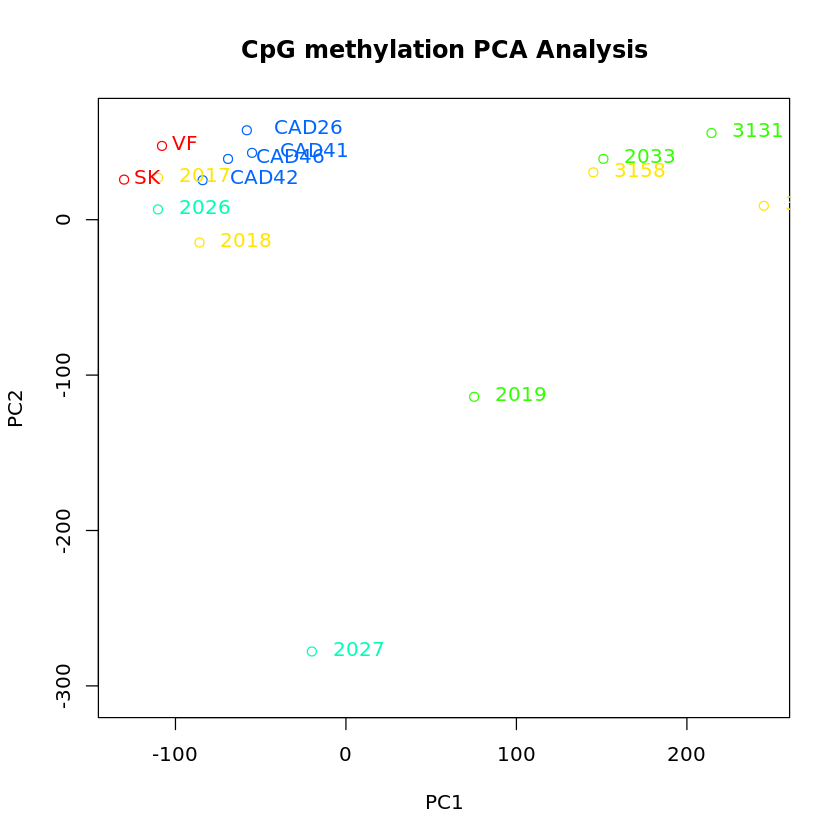

In [7]:
PCASamples(methDB)


In [51]:
sample_ids = c(
 'N1', # control
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'H26',
 'H28',

 'AC1', #stemi
 'AC2',
 'AC3',
 'AC4',
 'AC5',
 'AC6',
 'AC14',
 'AC15',

 'AC7',# nstemi
 'AC8',
 'AC9',
 'AC10',
 'AC11', 
 'AC12',
 'AC13',

 'AP1', #Acs/iAP
 'AP2',
 'AP3',
 'AP4',
 'AP5',  
 'AP6',

 'CS1', #CAD+posStressEcho
 'CS2',
 'CS3',
 'CS4', 
 'CS5',
 'CS6'
)



treatment=c(
    rep(0,8),  # control
    rep(1,8), #stemi
    rep(2,7),  # nstemi
    rep(3,6), #Acs/iAP
    rep(4,6) #CAD+posStressEcho
     )

In [50]:
sample_ids_no_cad = c(
 'N1', # control
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'H26',
 'H28',

 'AC1', #stemi
 'AC2',
 'AC3',
 'AC4',
 'AC5',
 'AC6',
 'AC14',
 'AC15',

 'AC7',# nstemi
 'AC8',
 'AC9',
 'AC10',
 'AC11', 
 'AC12',
 'AC13',

 'AP1', #Acs/iAP
 'AP2',
 'AP3',
 'AP4',
 'AP5',  
 'AP6'
)



treatment_no_cad=c(
    rep(0,8),  # control
    rep(1,8), #stemi
    rep(2,7),  # nstemi
    rep(3,6) #Acs/iAP
     )

In [9]:
p06_methyl_calls="/local/AAkalin_cardiac/Results/cardiac/06_methyl_calls_bwameth/"
tabix.files.filtered.dt_discovery=lapply(sample_ids, function(s){
           dbpath = paste0(p06_methyl_calls, s, "/tabix_CpG/",s,"_CpG_filtered.txt.bgz" )
           tmp=my.read.Tabix(dbpath,
               "tabix",
                s, 
                "hg38" ,
                "CpG",
                "base")})
names(tabix.files.filtered.dt_discovery) = sample_ids

Taking input= as a system command ('zcat /local/AAkalin_cardiac/Results/cardiac/06_methyl_calls_bwameth/N1/tabix_CpG/N1_CpG_filtered.txt.bgz') and a variable has been used in the expression passed to `input=`. Please use fread(cmd=...). There is a security concern if you are creating an app, and the app could have a malicious user, and the app is not running in a secure environment; e.g. the app is running as root. Please read item 5 in the NEWS file for v1.11.6 for more information and for the option to suppress this message.

Warning message in (if (.Platform$OS.type == "unix") system else shell)(paste0("(", :
"error in running command"
Warning message in data.table::fread(paste0("zcat ", dbpath)):
"File '/tmp/Rtmp09SEEG/file68d9762c' has size 0. Returning a NULL data.table."
Taking input= as a system command ('zcat /local/AAkalin_cardiac/Results/cardiac/06_methyl_calls_bwameth/N2/tabix_CpG/N2_CpG_filtered.txt.bgz') and a variable has been used in the expression passed to `input=`. P

In [10]:
all<-c(tabix.files.filtered.dt,tabix.files.filtered.dt_discovery)


In [11]:
methRawList_fil_all=new("methylRawList",
   lapply(all, function(x) x$obj),
   treatment=c(groups_v,treatment))

In [12]:
methDB_all<-methylKit::unite(methRawList_fil_all)


uniting...

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing fi

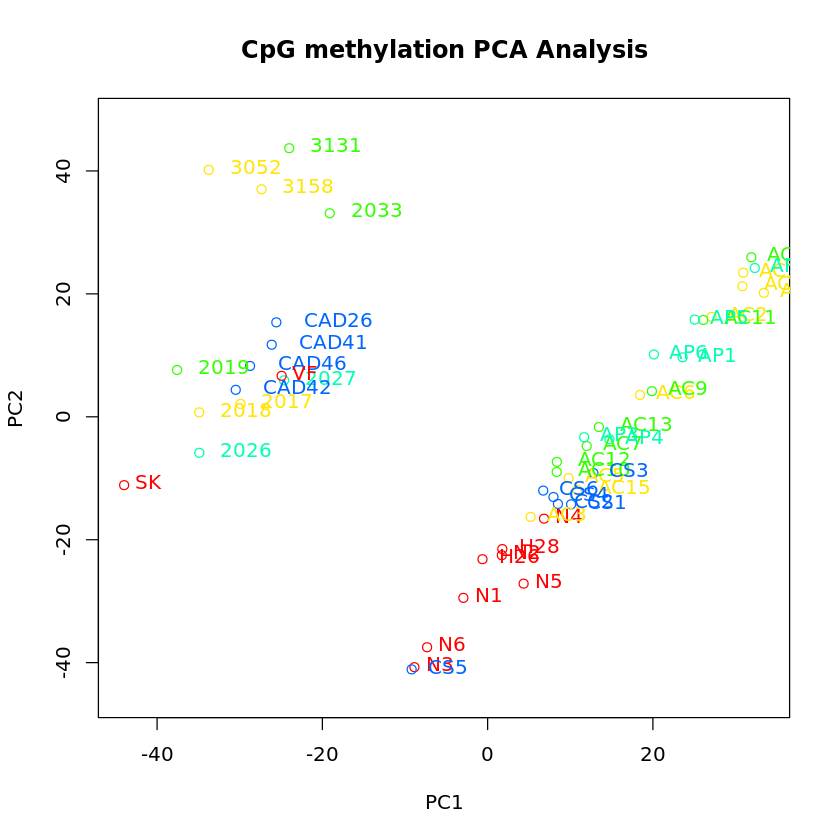

In [13]:
PCASamples(methDB_all)


In [21]:
tiles.path=paste0("/local/rcuadrat/cfdna_validation/tileMethylCounts/")
tiles=tileMethylCounts(methDB_all, 
  win.size=500,
  step.size=500,
  save.db=TRUE,
  suffix="tiles_win500bp_step500bp_all",
  dbdir=tiles.path)

compressing the file with bgzip...

making tabix index...



In [24]:
#PCASamples(tiles)

In [25]:
annotated_DMRs <- readRDS("/local/rcuadrat/cfdna_wgbs/tmp_dfs/annotated_DMRs.RDS")


In [37]:
concat_DMRs<-do.call(rbind, annotated_DMRs)
concat_DMRs <- concat_DMRs %>% select(seqnames,start,end) %>% unique()

In [42]:
ranges_stemi<-makeGRangesFromDataFrame(concat_DMRs)

In [43]:
regional.methylRaw=regionCounts(object=methDB_all, regions=ranges_stemi, 
cov.bases=0,strand.aware=FALSE)

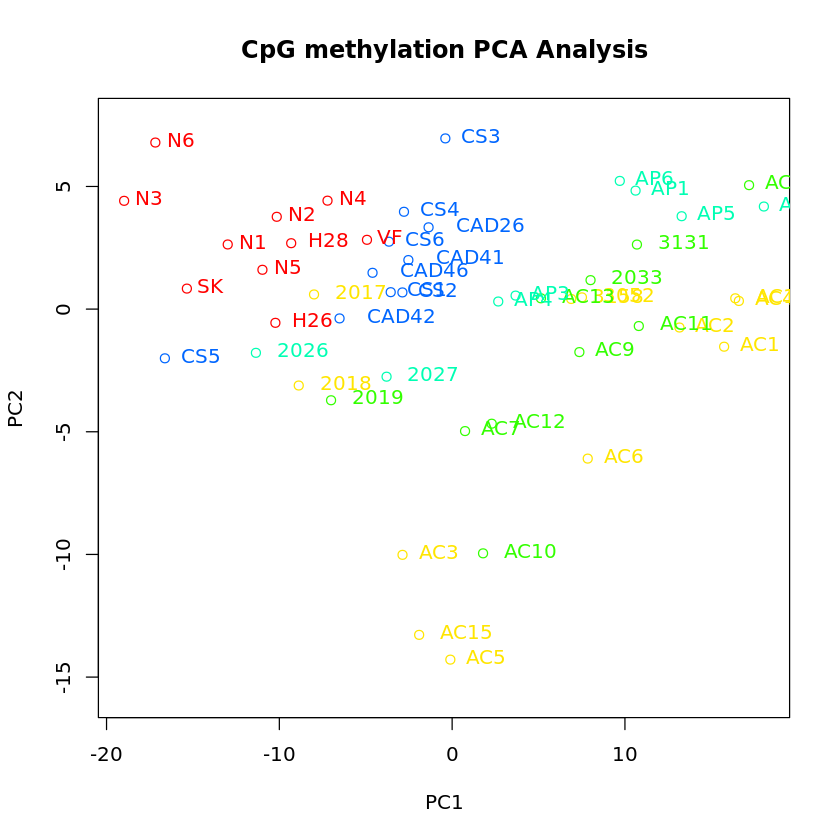

In [44]:
PCASamples(regional.methylRaw)

In [45]:
class(regional.methylRaw)

[1] "methylBase"
attr(,"package")
[1] "methylKit"

In [46]:
?reorganize

In [59]:
methRawList_fil_all_no_cad <- reorganize(
  methRawList_fil_all,
  c(sample_ids_v_no_cad,sample_ids_no_cad),
  c(groups_v_no_cad,treatment_no_cad),
  chunk.size = 1e+06,
  save.db = FALSE)

In [60]:
methDB_all_no_CAD<-methylKit::unite(methRawList_fil_all_no_cad)


uniting...

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing fi

In [61]:
regional.methylRaw_no_cad=regionCounts(object=methDB_all_no_CAD, regions=ranges_stemi, 
cov.bases=0,strand.aware=FALSE)

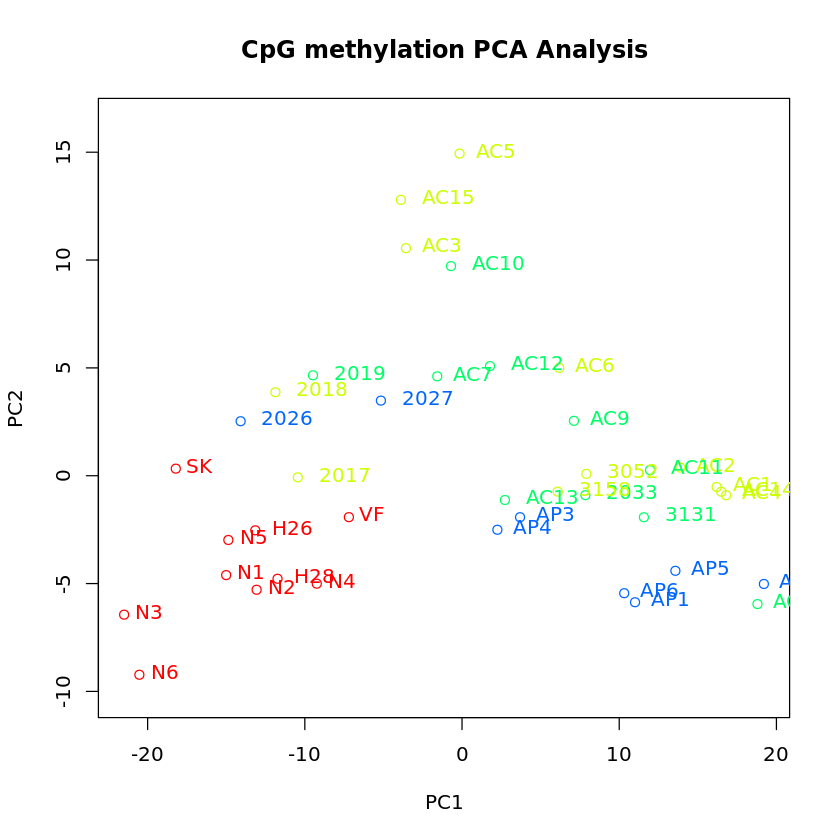

In [62]:
PCASamples(regional.methylRaw_no_cad)